# Visual Inspection of Motorcycle Connecting Rods

Students should develop a software system aimed at visual inspection of motorcycle connecting rods. The system should be able to analyse the dimensions of two different types of connecting rods to allow a vision-guided robot to pick and sort rods based on their type and dimensions. The two rod types are characterized by a different number of holes: Type A rods have one hole whilst Type B rods have two holes.

## Libraries and Data loading

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

import sys

sys.path.append(".")

data_folder = Path("ispezione-bielle-immagini")
task1_names = [
    "TESI00.BMP",
    "TESI01.BMP",
    "TESI12.BMP",
    "TESI21.BMP",
    "TESI31.BMP",
    "TESI33.BMP",
]

task2_names = [
    "TESI44.BMP",
    "TESI47.BMP",
    "TESI48.BMP",
    "TESI49.BMP",
    "TESI50.BMP",
    "TESI51.BMP",
    "TESI90.BMP",
    "TESI92.BMP",
    "TESI98.BMP",
]

paths_1 = []
paths_2 = []
for _path in data_folder.rglob("*.BMP"):
    if _path.name.upper() in task1_names:
        paths_1.append(_path)
    elif _path.name.upper() in task2_names:
        paths_2.append(_path)

# Load the images
images_1 = [cv2.imread(str(_path), cv2.IMREAD_GRAYSCALE) for _path in paths_1]
images_2 = [cv2.imread(str(_path), cv2.IMREAD_GRAYSCALE) for _path in paths_2]

## First task

**Image characteristics**
1. Images contain only connecting rods, which can be of both types and feature significantly diverse dimensions.
2. Connecting rods have been carefully placed within the inspection area so to appear well separated in images (i.e. they do not have any contact point).
3. Images have been taken by the backlighting technique so to render rods easily distinguishable (i.e. much darker) from background. However, for flexibility reasons the system should not
require any change to work properly with lighting sources of different power.

**Functional specifications**
For each connecting rod appearing in the image, the vision system should provide the following information:
1. Type of rod (A or B).
2. Position and orientation (modulo $\pi$).
3. Length, width and width at the barycenter.
4. For each hole, position of the centre and diameter size.

***

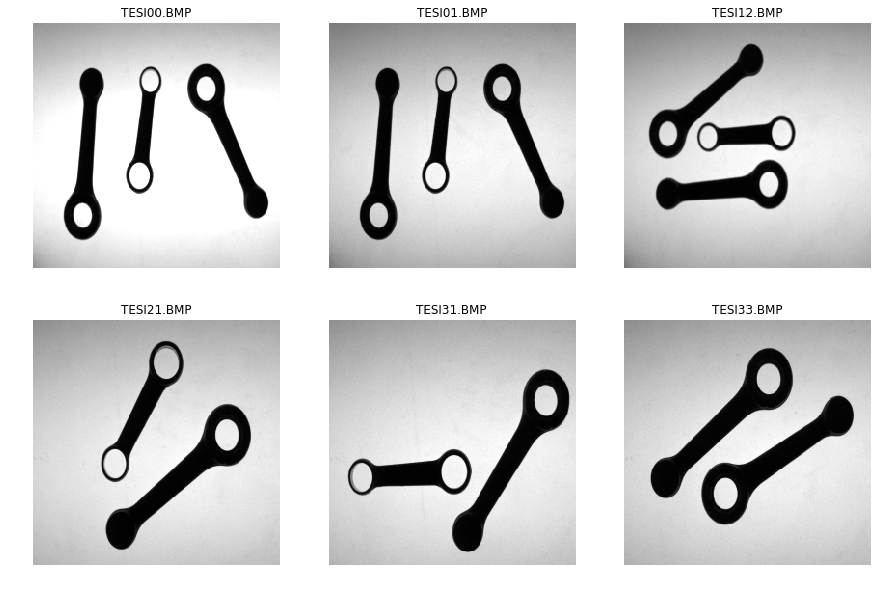

In [2]:
# Print the images in a grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, (img, path) in enumerate(zip(images_1, paths_1)):
    axs[i // 3, i % 3].imshow(img, cmap="gray")
    axs[i // 3, i % 3].set_title(path.name)
    axs[i // 3, i % 3].axis("off")
plt.show()

### Rod-type Detection

**Objectives**: detect the rods, detect the holes in each rod

The algorithm first preprocesses the image by applying a Gaussian filter (given $\sigma$, we set the kernel size to be equal to $\lceil (3 \sigma)^2 + 1 \rceil$.) and thresholding the image to create a binary image (we exploit the OpenCV method `cv2.threshold(img, thresh, maxval, type=cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)`). It then uses the `cv2.connectedComponentsWithStats()` function to find the connected components in the binary image. Each connected component corresponds to a rod in the image.

For each rod, the algorithm extracts the connected component and calculates its area, centroid, and number of holes. It then classifies the rod as either "Type A" (one hole) or "Type B" (two holes) based on the number of holes. Finally, it plots the connected component and displays the rod type.

The algorithm uses the OpenCV library to perform the image processing and blob detection. Blob detection is a technique for detecting regions in an image that share common properties, such as color or texture. In this case, the algorithm uses blob detection to detect the rods in the image. The algorithm then analyzes each rod to count the number of holes and classify the rod type. 

The algorithm is useful for applications such as quality control in manufacturing, where it is important to detect defects in products. By detecting the number of holes in each rod, the algorithm can identify defective rods that do not meet the required specifications.



INFO:root:Gaussian filter parameters --- sigma: 1, kernel size: 7
INFO:root:Number of rods found (CC): 3
INFO:root:Processing connected components individually...

INFO:root:Processing rod 1...
INFO:root:Centroid (CC): (201, 118)
INFO:root:Area (CC): 3227
INFO:root:Number of holes: 1
INFO:root:Rod type: A

INFO:root:Rod Length: 169.3535
INFO:root:Rod Width: 39.7763
INFO:root:Rod Angle (deg): 110.4002
INFO:root:Rod Angle (rad): 1.9268

INFO:root:Rod mass center: (198, 113)
INFO:root:Width at mass center: 14.7648
INFO:root:Hole mass center: [(179, 68)]
INFO:root:Hole diameter: [26.383808135986328]
INFO:root:
*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^

INFO:root:Processing rod 2...
INFO:root:Centroid (CC): (115, 113)
INFO:root:Area (CC): 1477
INFO:root:Number of holes: 2
INFO:root:Rod type: B

INFO:root:Rod Length: 130.9147
INFO:root:Rod Width: 26.8891
INFO:root:Rod Angle (deg): 84.8056
INFO:root:Rod Angle (rad): 1.4801

INFO:root:

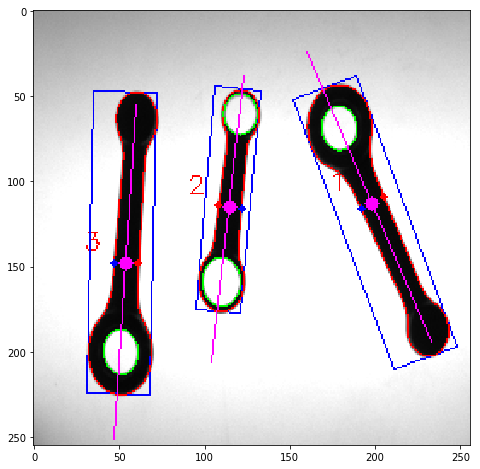

In [143]:
from src.rod_detection import detect_rods_blob, detect_rods

# Detects the rods for a single image, it outputs the various steps
rod_info = detect_rods_blob(images_1[0])

To run the code for every image in the list you can simply call the higher level method that iterates over the list.

In [ ]:
# results = detect_rods(images_1, paths_1)

## Second task

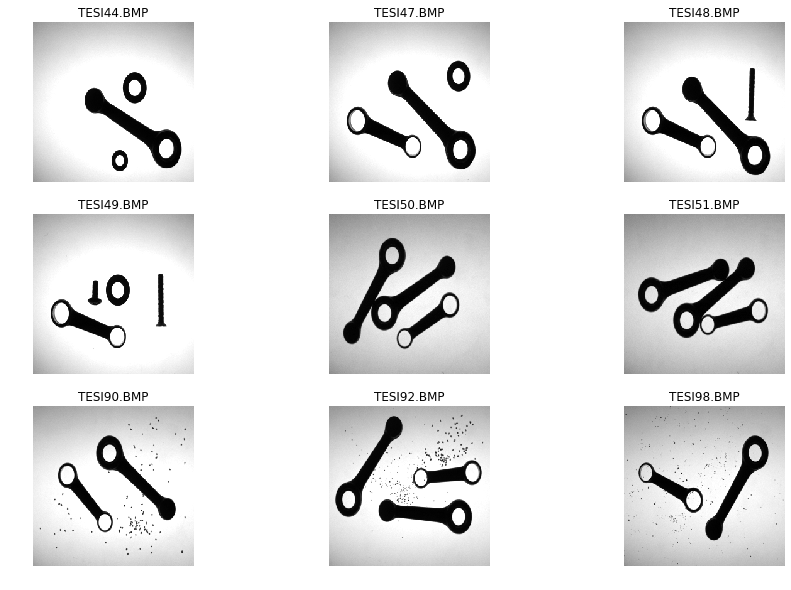

In [145]:
# Print the images in a grid
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
for i, (img, path) in enumerate(zip(images_2, paths_2)):
    axs[i // 3, i % 3].imshow(img, cmap="gray")
    axs[i // 3, i % 3].set_title(path.name)
    axs[i // 3, i % 3].axis("off")
plt.show()

In [214]:
rod_info = detect_rods_blob(images_2[0], min_area=1500)

INFO:root:Gaussian filter parameters --- sigma: 1, kernel size: 7
INFO:root:Filtering rods by area...


{'number_of_rods': 1, 'width': [], 'barycenter': [], 'width_at_barycenter': [], 'contours': [], 'rod_type': [], 'holes_diameter': [], 'coord': [], 'stats': array([[    0,     0,   256,   255, 58755],
       [   82,   105,   154,   128,  4955]], dtype=int32), 'dim': [], 'num_labels': 2, 'number_of_holes': [], 'holes_barycenter': [], 'length': [], 'area': [], 'hierarchy': [], 'angle': [], 'labels': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)}


In [215]:
rod_info

{'angle': [],
 'area': [],
 'barycenter': [],
 'contours': [],
 'coord': [],
 'dim': [],
 'hierarchy': [],
 'holes_barycenter': [],
 'holes_diameter': [],
 'labels': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 'length': [],
 'num_labels': 2,
 'number_of_holes': [],
 'number_of_rods': 1,
 'rod_type': [],
 'stats': array([[    0,     0,   256,   255, 58755],
        [   82,   105,   154,   128,  4955]], dtype=int32),
 'width': [],
 'width_at_barycenter': []}

In [205]:
rod_info["stats"].shape

(1, 5)

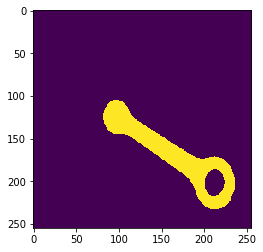

In [216]:
plt.imshow(rod_info["labels"])